# Principal Component Analysis

- Principal Component Analysis is used to narrow down the number of features by while trying to lose as little valuable information as possible
- This can occur by compressing multiple features into one feature
- The cost is that some information is lost but if the cost is small then it can be very beneficial

In [28]:
from sklearn.decomposition import PCA                           # import Principal component model from sklearn.deconposition library
from sklearn.preprocessing import StandardScaler                # import Standard Scaler from sklearn.preprocessing library  
import pandas as pd                                             # import pandas for data frame manipulation 
import matplotlib.pyplot as plt                                 # import pyplot for plotting

# sns.pairplot(dataset)                    # Plots all the features agains one another

car_df = pd.read_csv("car_price.csv")                           # Read CSV file and assign values to car_df variable
car_df.head(100)                                                # Display head - first 100 rows




,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45330228,32929,-,BMW,428 Sport Line,2013,Coupe,Yes,Petrol,2.0 Turbo,160000 km,4,Automatic,Rear,02-Mar,Left wheel,Black,12
96,45776745,18817,-,NISSAN,Patrol,1990,Jeep,No,Diesel,2.8 Turbo,333333 km,4,Manual,Rear,04-May,Left wheel,Black,0
97,45749534,4234,-,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0 km,4,Manual,Front,02-Mar,Left wheel,Blue,6
98,45789555,15053,-,MERCEDES-BENZ,E 320,2004,Sedan,Yes,Petrol,3.2,214000 km,6,Tiptronic,Rear,04-May,Left wheel,Grey,8


- Lets have a look at the dataset in more detail as it has 81 features in total






.

In [29]:
print("Dataframe shape: " + str(car_df.shape) + "\n")                                 # Shows the size of the dataframe - in this case, 19237 rows and 18 columns
car_df.describe()                                                                     # Describes the dataset showing count, mean etc

Dataframe shape: (19237, 18)



,ID,Price,Prod_year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


- We will now need to clean the data








In [30]:
car_df.isnull().sum()                   # This method counts if there are any null values in the dataset               
                                        # As the column count above is all equal to 19,237 rows, this tells us that there are not any null values in the dataset
                                        # Confirmation below of what we have already deduced from the above 

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

- Lets check the data types of the features, we will need all the data types to be numeric, either integers or floats to work in the PCA model

In [31]:
car_df.dtypes                    # Any data type that isn't an int or a float will need to be conversted to an int in order for PCA to work

ID                   int64
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod_year            int64
Category            object
Leather_interior    object
Fuel_type           object
Engine_volume       object
Mileage             object
Cylinders            int64
Gear_box_type       object
Drive_wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

- We also can drop the features "ID" and "Levy" as they don't add any value to the data set

In [32]:
car_df = car_df.drop(["Levy", "ID"], axis = 1)                  # Dropped features "Levy" and "ID" as they don't add any value to the dataset


In [33]:
car_df["Manufacturer"] = pd.factorize(car_df.Manufacturer)[0]                           # This pd.factorize method changes categorical data to integers. Saves a lot of time of doing each manually, especially because there are a lot of categories in each feature
car_df["Model"] = pd.factorize(car_df.Model)[0]                                         # E.g., the Manufacturer Honda has been assigned the value of 2 throughout the dataset - look at the 3rd and 97th row for confirmation above
car_df["Category"] = pd.factorize(car_df.Category)[0]
car_df["Leather_interior"] = pd.factorize(car_df.Leather_interior)[0]
car_df["Fuel_type"] = pd.factorize(car_df.Fuel_type)[0]
car_df["Engine_volume"] = pd.factorize(car_df.Engine_volume)[0]
car_df["Mileage"] = pd.factorize(car_df.Mileage)[0]
car_df["Gear_box_type"] = pd.factorize(car_df.Gear_box_type)[0]
car_df["Drive_wheels"] = pd.factorize(car_df.Drive_wheels)[0]
car_df["Doors"] = pd.factorize(car_df.Doors)[0]
car_df["Wheel"] = pd.factorize(car_df.Wheel)[0]
car_df["Color"] = pd.factorize(car_df.Color)[0]










.

In [34]:
car_df.head(100)              # check to see that the pd.factorize method worked correctly

,Price,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,0,0,2010,0,0,0,0,0,6,0,0,0,0,0,12
1,16621,1,1,2011,0,1,1,1,1,6,1,0,0,0,1,8
2,8467,2,2,2006,1,1,1,2,2,4,2,1,0,1,1,2
3,3607,3,3,2011,0,0,0,3,3,4,0,0,0,0,2,0
4,11726,2,2,2014,1,0,1,2,4,4,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32929,9,55,2013,6,0,1,10,88,4,0,2,1,0,1,12
96,18817,14,56,1990,0,1,2,25,89,4,3,2,0,0,1,0
97,4234,2,29,1997,1,0,1,23,11,4,3,1,1,0,4,6
98,15053,6,57,2004,2,0,1,26,90,6,1,2,0,0,3,8


In [35]:
car_df.dtypes                                 # Check to see the data types - good news to see that all are now displaying as ints. We are ready to work with the data

Price               int64
Manufacturer        int64
Model               int64
Prod_year           int64
Category            int64
Leather_interior    int64
Fuel_type           int64
Engine_volume       int64
Mileage             int64
Cylinders           int64
Gear_box_type       int64
Drive_wheels        int64
Doors               int64
Wheel               int64
Color               int64
Airbags             int64
dtype: object

In [36]:
X_values = list(car_df.columns[1:17])              # X values are the independant values and are now assigned to a list
print(X_values)

['Manufacturer', 'Model', 'Prod_year', 'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage', 'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color', 'Airbags']


In [37]:
y_value = car_df["Price"]                           # The car price is the dependant value, as the price of the car depends on all the other "specifications"

- Let's get working on the model

In [38]:
scaler = StandardScaler()                         # Instantiate and instance of the scaler, this is used for scaling the data to improve accuracy of results

std_car_df = scaler.fit_transform(X_values)       # As per the above, data is now assigned to new variable std_car_df which is scaled

pca = PCA()                                       # Instantiate and instance of the Principal Component Analysis         

print(pca.fit_transform(std_car_df))


ValueError: ignored

In [ ]:
sns.pairplot(std_car_df)
plt.show()

TypeError: ignored

In [ ]:
print(pca.explained_variance_ratio_.cumsum())

[0.17000679 0.2708734  0.35831097 0.43478866 0.50566383 0.56845822
 0.62999548 0.68427423 0.73807752 0.78936909 0.83323577 0.8740019
 0.91256023 0.94892748 0.97583439 1.        ]


In [ ]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

What we have done is distill our 4D data set down to 2D, by projecting it down to two orthogonal 4D vectors that make up the basis of our new 2D projection. We can see what those 4D vectors are, although it's not something you can really wrap your head around:

In [ ]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Let's see how much information we've managed to preserve:

In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


That's pretty cool. Although we have thrown away two of our four dimensions, PCA has chosen the remaining two dimensions well enough that we've captured 92% of the variance in our data in a single dimension alone! The second dimension just gives us an additional 5%; altogether we've only really lost less than 3% of the variance in our data by projecting it down to two dimensions.

As promised, now that we have a 2D representation of our data, we can plot it:

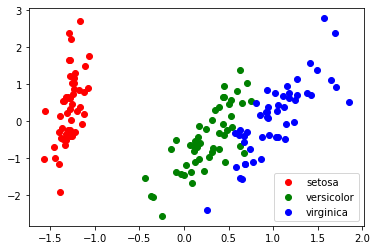

In [ ]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()
    